<a href="https://colab.research.google.com/github/meisamgh/Machine_Learning_Trading/blob/main/Copy_of_TA_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib


In [ ]:
!sudo apt-get install libatlas-base-dev python-dev gfortran pkg-config libfreetype6-dev hdf5-tools


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
libatlas-base-dev is already the newest version (3.10.3-5).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
libfreetype6-dev is already the newest version (2.8.1-2ubuntu2.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  hdf5-tools
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 390 kB of archives.
After this operation, 2,280 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 hdf5-tools amd64 1.10.0-patch1+docs-4 [390 kB]
Fetched 390 kB in 1s (625 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is inst

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install pandas_datareader
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e17106a45442ae1d6ad76480eda50dd186382f5d6de304511de3ed05187c0968
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import yfinance as yf


In [ ]:
#tickers = ['AAPL']#,'GOGO','TSLA','NKE','SPY']
#data = web.DataReader(tickers , 'yahoo', start='2018/01/01', end='2019/12/31')
data = yf.download(tickers="AAPL" ,period="1y",interval="60m")

# data = yf.download(tickers=["MSFT",'GOGO'] ,period="2y",interval="60m")
# data.head()#

#data.columns = ['Adj close' , 'Close' , 'High' , 'Low' , 'Open' , 'Volume']
data['open']=data['Open'].shift(1)
data['high']=data['High'].shift(1)
data['low']=data['Low'].shift(1)
data['close']=data['Close'].shift(1)
data['volume']=data['Volume'].shift(1)
data['adj close']=data['Adj Close'].shift(1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
alpha = pd.DataFrame(index=data.index).sort_index()

#### Overlap Studies #####

close = data.close
high = data.high
low = data.low
open = data.open
volume = data.volume
adj_close = data['adj close']

from talib import (RSI, BBANDS, MACD , ADX , DEMA , EMA , HT_TRENDLINE , KAMA , MA , MAMA , 
                   MAVP, MIDPOINT , MIDPRICE , SAR , SAREXT , SMA , T3, TEMA , TRIMA , WMA)


alpha['up_band'], alpha['mid_band'], alpha['low_band'] = BBANDS(close , timeperiod=20 ,nbdevup=2, nbdevdn=2, matype=0)
alpha['up'], alpha['mid'], alpha['low_'] = BBANDS(adj_close , timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
alpha['macd'], alpha['macdsignal'], alpha['macdhist'] = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
alpha['DEMA'] = DEMA(close, timeperiod=30)
alpha['EMA'] = EMA(close, timeperiod=30)
alpha['HT_TRENDLINE'] = HT_TRENDLINE(close)
alpha['KAMA'] = KAMA(close, timeperiod=30)
alpha['MA'] = MA(close, timeperiod=30, matype=0)
#alpha['mama'], alpha['fama'] = MAMA(close, fastlimit=0, slowlimit=0)
#alpha['MAVP'] = MAVP(close, periods= 3, minperiod=2, maxperiod=30, matype=0)
alpha['MIDPOINT'] = MIDPOINT(close, timeperiod=14)
alpha['MIDPRICE'] = MIDPRICE(high, low, timeperiod=14)
alpha['SAR'] = SAR(high, low, acceleration=0, maximum=0)
alpha['SAREXT'] = SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
alpha['SMA'] = SMA(close, timeperiod=30)
alpha['T3'] = T3(close, timeperiod=5, vfactor=0)
alpha['TEMA'] = TEMA(close, timeperiod=30)
alpha['TRIMA'] = TRIMA(close, timeperiod=30)
alpha['WMA'] = WMA(close, timeperiod=30)



In [ ]:
## Momentum ####
import talib as ta
from talib import ( ADX , ADXR , APO  , AROON , AROONOSC , BOP, CCI , CMO , DX , MACDFIX , MFI , MINUS_DI,
                   MINUS_DM , MOM , PLUS_DI , PLUS_DM , PPO , ROC , ROCP ,  ROCR , ROCR100 , RSI  , MACDEXT,MACDFIX,
                   STOCH , STOCHF , STOCHRSI, TRIX , ULTOSC , WILLR)

alpha['ADX'] = ADX(high, low, close, timeperiod=14)
alpha['ADXR'] = ADXR(high, low, close, timeperiod=14)
alpha['APO'] = APO(close, fastperiod=12, slowperiod=26, matype=0)
alpha['aroondown'], alpha['aroonup'] = AROON(high, low, timeperiod=14)
alpha['AROONOSC'] = AROONOSC(high, low, timeperiod=14)
alpha['BOP'] = BOP(open, high, low, close)
alpha['CCI'] = CCI(high, low, close, timeperiod=14)
alpha['CMO'] = CMO(close, timeperiod=14)
alpha['DX'] = DX(high, low, close, timeperiod=14)
alpha['macd'], alpha['macdsignal'], alpha['macdhist'] = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
alpha['macd_1'], alpha['macdsignal_1'], alpha['macdhist_1'] = MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
alpha['macd_1'], alpha['macdsignal_1'], alpha['macdhist_1'] = MACDFIX(close, signalperiod=9)
alpha['MFI'] = MFI(high, low, close, volume, timeperiod=14)
alpha['MINUS_DI'] = MINUS_DI(high, low, close, timeperiod=14)
alpha['MINUS_DM'] = MINUS_DM(high, low, timeperiod=14)
alpha['MOM'] = MOM(close, timeperiod=10)
alpha['PLUS_DI'] = PLUS_DI(high, low, close, timeperiod=14)
alpha['PLUS_DM'] = PLUS_DM(high, low, timeperiod=14)
alpha['PPO'] = PPO(close, fastperiod=12, slowperiod=26, matype=0)
alpha['ROC'] = ROC(close, timeperiod=10)
alpha['ROCP'] = ROCP(close, timeperiod=10)
alpha['ROCR'] = ROCR(close, timeperiod=10)
alpha['ROCR100'] = ROCR100(close, timeperiod=10)
alpha['RSI'] = RSI(close, timeperiod=14)
alpha['slowk'], alpha['slowd'] = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
alpha['fastk_F'], alpha['fastd_F'] = STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
alpha['fastk_RSI'], alpha['fastd_RSI'] = STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
alpha['TRIX'] = TRIX(close, timeperiod=30)
alpha['ULTOSC'] = ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
alpha['WILLR'] = WILLR(high, low, close, timeperiod=14)


In [ ]:


alpha['CDL2CROWS'] = ta.CDL2CROWS(open, high, low, close)
alpha['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(open, high, low, close)
alpha['CDL3INSIDE'] = ta.CDL3INSIDE(open, high, low, close)
alpha['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(open, high, low, close)
alpha['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(open, high, low, close)
alpha['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(open, high, low, close)
alpha['CDL3WHITESOLDIERS'] = ta.CDL3WHITESOLDIERS(open, high, low, close)
alpha['CDLABANDONEDBABY'] = ta.CDLABANDONEDBABY(open, high, low, close, penetration=0)
alpha['CDLADVANCEBLOCK'] = ta.CDLADVANCEBLOCK(open, high, low, close)
alpha['CDLBELTHOLD'] = ta.CDLBELTHOLD(open, high, low, close)
alpha['CDLBREAKAWAY'] = ta.CDLBREAKAWAY(open, high, low, close)
alpha['CDLCLOSINGMARUBOZU'] = ta.CDLCLOSINGMARUBOZU(open, high, low, close)
alpha['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(open, high, low, close)
alpha['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(open, high, low, close)
alpha['CDLCOUNTERATTACK'] = ta.CDLCOUNTERATTACK(open, high, low, close)
alpha['CDLDARKCLOUDCOVER'] = ta.CDLDARKCLOUDCOVER(open, high, low, close, penetration=0)
alpha['CDLDOJI'] = ta.CDLDOJI(open, high, low, close)
alpha['CDLDOJISTAR'] = ta.CDLDOJISTAR(open, high, low, close)
alpha['CDLDRAGONFLYDOJI'] = ta.CDLDRAGONFLYDOJI(open, high, low, close)
alpha['CDLENGULFING'] = ta.CDLENGULFING(open, high, low, close)
alpha['CDLEVENINGDOJISTAR'] = ta.CDLEVENINGDOJISTAR(open, high, low, close, penetration=0)
alpha['CDLEVENINGSTAR'] = ta.CDLEVENINGSTAR(open, high, low, close, penetration=0)
alpha['CDLGAPSIDESIDEWHITE'] = ta.CDLGAPSIDESIDEWHITE(open, high, low, close)
alpha['CDLGRAVESTONEDOJI'] = ta.CDLGRAVESTONEDOJI(open, high, low, close)
alpha['CDLHAMMER'] = ta.CDLHAMMER(open, high, low, close)
alpha['CDLHANGINGMAN'] = ta.CDLHANGINGMAN(open, high, low, close)
alpha['CDLHARAMI'] = ta.CDLHARAMI(open, high, low, close)
alpha['CDLHARAMICROSS'] = ta.CDLHARAMICROSS(open, high, low, close)
alpha['CDLHIGHWAVE'] = ta.CDLHIGHWAVE(open, high, low, close)
alpha['CDLHIKKAKE'] = ta.CDLHIKKAKE(open, high, low, close)
alpha['CDLHIKKAKEMOD'] = ta.CDLHIKKAKEMOD(open, high, low, close)
alpha['CDLHOMINGPIGEON'] = ta.CDLHOMINGPIGEON(open, high, low, close)
alpha['CDLIDENTICAL3CROWS'] = ta.CDLIDENTICAL3CROWS(open, high, low, close)
alpha['CDLINNECK'] = ta.CDLINNECK(open, high, low, close)
alpha['CDLINVERTEDHAMMER'] = ta.CDLINVERTEDHAMMER(open, high, low, close)
alpha['CDLKICKING'] = ta.CDLKICKING(open, high, low, close)
alpha['CDLKICKINGBYLENGTH'] = ta.CDLKICKINGBYLENGTH(open, high, low, close)
alpha['CDLLADDERBOTTOM'] = ta.CDLLADDERBOTTOM(open, high, low, close)
alpha['CDLLONGLEGGEDDOJI'] = ta.CDLLONGLEGGEDDOJI(open, high, low, close)
alpha['CDLLONGLINE'] = ta.CDLLONGLINE(open, high, low, close)
alpha['CDLMARUBOZU'] = ta.CDLMARUBOZU(open, high, low, close)
alpha['CDLMATCHINGLOW'] = ta.CDLMATCHINGLOW(open, high, low, close)
alpha['CDLMATHOLD'] = ta.CDLMATHOLD(open, high, low, close, penetration=0)
alpha['CDLMORNINGDOJISTAR'] = ta.CDLMORNINGDOJISTAR(open, high, low, close, penetration=0)
alpha['CDLMORNINGSTAR'] = ta.CDLMORNINGSTAR(open, high, low, close, penetration=0)
alpha['CDLONNECK'] = ta.CDLONNECK(open, high, low, close)
alpha['CDLPIERCING'] = ta.CDLPIERCING(open, high, low, close)
alpha['CDLRICKSHAWMAN'] = ta.CDLRICKSHAWMAN(open, high, low, close)
alpha['CDLRISEFALL3METHODS'] = ta.CDLRISEFALL3METHODS(open, high, low, close)
alpha['CDLSEPARATINGLINES'] = ta.CDLSEPARATINGLINES(open, high, low, close)
alpha['CDLSHOOTINGSTAR'] = ta.CDLSHOOTINGSTAR(open, high, low, close)
alpha['CDLSHORTLINE'] = ta.CDLSHORTLINE(open, high, low, close)
alpha['CDLSPINNINGTOP'] = ta.CDLSPINNINGTOP(open, high, low, close)
alpha['CDLSTALLEDPATTERN'] = ta.CDLSTALLEDPATTERN(open, high, low, close)
alpha['CDLSTICKSANDWICH'] = ta.CDLSTICKSANDWICH(open, high, low, close)
alpha['CDLTAKURI'] = ta.CDLTAKURI(open, high, low, close)
alpha['CDLTASUKIGAP'] = ta.CDLTASUKIGAP(open, high, low, close)
alpha['CDLTHRUSTING'] = ta.CDLTHRUSTING(open, high, low, close)
alpha['CDLTRISTAR'] = ta.CDLTRISTAR(open, high, low, close)
alpha['CDLUNIQUE3RIVER'] = ta.CDLUNIQUE3RIVER(open, high, low, close)
alpha['CDLUPSIDEGAP2CROWS'] = ta.CDLUPSIDEGAP2CROWS(open, high, low, close)
alpha['CDLXSIDEGAP3METHODS'] = ta.CDLXSIDEGAP3METHODS(open, high, low, close)


In [ ]:
#### Volume Indicator Functions

from talib import AD, ADOSC , OBV

alpha['AD'] = AD(high, low, close, volume)
alpha['ADOSC'] = ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
alpha['OBV'] = OBV(close, volume)


In [ ]:
###### Volatility Indicator Functions

from  talib import   ATR , TRANGE , NATR

alpha['ATR'] = ATR(high, low, close, timeperiod=14)
alpha['NATR'] = NATR(high, low, close, timeperiod=14)
alpha['TRANGE'] = TRANGE(high, low, close)


In [ ]:
#### Price Transform Functions
from talib import AVGPRICE, MEDPRICE  , TYPPRICE , WCLPRICE

alpha['AVGPRICE'] = AVGPRICE(open, high, low, close)
alpha['MEDPRICE'] = MEDPRICE(high, low)
alpha['TYPPRICE'] = TYPPRICE(high, low, close)
alpha['WCLPRICE'] = WCLPRICE(high, low, close)

In [ ]:
####### Volatality 
from talib import  HT_DCPERIOD , HT_DCPHASE , HT_PHASOR, HT_SINE, HT_TRENDMODE

alpha['HT_DCPERIOD'] = HT_DCPERIOD(close)
alpha['HT_DCPHASE'] = HT_DCPHASE(close)
alpha['inphase'], alpha['quadrature'] = HT_PHASOR(close)
alpha['sine'], alpha['leadsine'] = HT_SINE(close)
alpha['alpha'] = HT_TRENDMODE(close)


In [ ]:
######### Statistic Functions
from talib import BETA , CORREL, LINEARREG, LINEARREG_ANGLE, LINEARREG_INTERCEPT, LINEARREG_SLOPE, LINEARREG_SLOPE, STDDEV , TSF

alpha['BETA'] = BETA(high, low, timeperiod=5)
alpha['CORREL'] = CORREL(high, low, timeperiod=30)
alpha['LINEARREG'] = LINEARREG(close, timeperiod=14)
alpha['LINEARREG_ANGLE'] = LINEARREG_ANGLE(close, timeperiod=14)
alpha['LINEARREG_INTERCEPT'] = LINEARREG_INTERCEPT(close, timeperiod=14)
alpha['LINEARREG_SLOPE'] = LINEARREG_SLOPE(close, timeperiod=14)
alpha['STDDEV'] = STDDEV(close, timeperiod=5, nbdev=1)
alpha['TSF'] = TSF(close, timeperiod=14)
#['VAR'] = VAR(close, timeperiod=5, nbdev=1)


In [ ]:
### Math Operator Functions
from talib import ADD, DIV , MAX , MAXINDEX, MIN, MININDEX , MULT, SUB , SUM

alpha['ADD'] = ADD(high, low)
alpha['DIV'] = DIV(high, low)
alpha['MAX'] = MAX(close, timeperiod=30)
#alpha['MAXINDEX'] = MAXINDEX(close, timeperiod=30)
alpha['MIN'] = MIN(close, timeperiod=30)
#alpha['MININDEX'] = MININDEX(close, timeperiod=30)
alpha['MULT'] = MULT(high, low)
alpha['SUB'] = SUB(high, low)
alpha['SUM'] = SUM(close, timeperiod=30)

In [ ]:
!pip install ta

In [ ]:
import ta

alpha['awesome_oscillator']=ta.momentum.awesome_oscillator(high, low, window1=5, window2=34, fillna=False)
alpha['ppo_hist']=ta.momentum.ppo_hist(close, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False)
alpha['ppo_signal']=ta.momentum.ppo_signal(close, window_slow=26, window_fast=12, window_sign=9, fillna=False)
alpha['pvo']=ta.momentum.pvo(volume, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False) 
alpha['pvo_hist']=ta.momentum.pvo_hist(volume, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False) 
alpha['pvo_signal']=ta.momentum.pvo_signal(volume, window_slow = 26, window_fast = 12, window_sign = 9, fillna= False)
alpha['roc']=ta.momentum.roc(close, window = 12, fillna= False)
alpha['stoch_signal']=ta.momentum.stoch_signal(high, low, close, window=14, smooth_window=3, fillna=False) 
alpha['stochrsi_d']=ta.momentum.stochrsi_d(close, window = 14, smooth1 = 3, smooth2 = 3, fillna= False)
alpha['stochrsi_k']=ta.momentum.stochrsi_k(close, window = 14, smooth1 = 3, smooth2 = 3, fillna= False)
alpha['tsi']=ta.momentum.tsi(close, window_slow=25, window_fast=13, fillna=False)
alpha['ultimate_oscillator']=ta.momentum.ultimate_oscillator(high, low, close, window1=7, window2=14, window3=28, weight1=4.0, weight2=2.0, weight3=1.0, fillna=False)


#alpha['AverageTrueRange']=ta.volatility.AverageTrueRange(high, low, close, window = 14, fillna= False)
#alpha['bollinger_hband_indicator']=ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
alpha['bollinger_lband']=ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
alpha['bollinger_mavg']=ta.volatility.bollinger_mavg(close, window=20, fillna=False)
alpha['bollinger_pband']=ta.volatility.bollinger_pband(close, window=20, window_dev=2, fillna=False)
alpha['bollinger_wband']=ta.volatility.bollinger_wband(close, window=20, window_dev=2, fillna=False)
alpha['donchian_channel_hband']=ta.volatility.donchian_channel_hband(high, low, close, window=20, offset=0, fillna=False)
alpha['donchian_channel_lband']=ta.volatility.donchian_channel_lband(high, low, close, window=20, offset=0, fillna=False)
alpha['donchian_channel_mband']=ta.volatility.donchian_channel_mband(high, low, close, window=10, offset=0, fillna=False)
alpha['donchian_channel_pband']=ta.volatility.donchian_channel_pband(high, low, close, window=10, offset=0, fillna=False)
alpha['donchian_channel_wband']=ta.volatility.donchian_channel_wband(high, low, close, window=10, offset=0, fillna=False)
alpha['keltner_channel_hband']=ta.volatility.keltner_channel_hband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
#alpha['keltner_channel_hband_indicator']=ta.volatility.keltner_channel_hband_indicator(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
alpha['keltner_channel_lband']=ta.volatility.keltner_channel_lband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
#alpha['keltner_channel_lband_indicator']=ta.volatility.keltner_channel_lband_indicator(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
alpha['keltner_channel_mband']=ta.volatility.keltner_channel_mband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
alpha['keltner_channel_pband']=ta.volatility.keltner_channel_pband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
alpha['keltner_channel_wband']=ta.volatility.keltner_channel_wband(high, low, close, window=20, window_atr=10, fillna=False, original_version=True)
alpha['ulcer_index']=ta.volatility.ulcer_index(close, window=14, fillna=False)

alpha['adx']=ta.trend.adx(high, low, close, window=14, fillna=False)
alpha['adx_neg']=ta.trend.adx_neg(high, low, close, window=14, fillna=False)
alpha['adx_pos']=ta.trend.adx_pos(high, low, close, window=14, fillna=False)
alpha['aroon_down']=ta.trend.aroon_down(close, window=25, fillna=False)
alpha['aroon_up']=ta.trend.aroon_up(close, window=25, fillna=False)
alpha['dpo']=ta.trend.dpo(close, window=20, fillna=False)
alpha['ichimoku_a']=ta.trend.ichimoku_a(high, low, window1=9, window2=26, visual=False, fillna=False)
alpha['ichimoku_b']=ta.trend.ichimoku_b(high, low, window2=26, window3=52, visual=False, fillna=False)
alpha['ichimoku_base_line']=ta.trend.ichimoku_base_line(high, low, window1=9, window2=26, visual=False, fillna=False) 
alpha['ichimoku_conversion_line']=ta.trend.ichimoku_conversion_line(high, low, window1=9, window2=26, visual=False, fillna=False) 
alpha['kst']=ta.trend.kst(close, roc1=10, roc2=15, roc3=20, roc4=30, window1=10, window2=10, window3=10, window4=15, fillna=False)
alpha['kst_sig']=ta.trend.kst_sig(close, roc1=10, roc2=15, roc3=20, roc4=30, window1=10, window2=10, window3=10, window4=15, nsig=9, fillna=False)
alpha['macd_diff']=ta.trend.macd_diff(close, window_slow=26, window_fast=12, window_sign=9, fillna=False)
alpha['mass_index']=ta.trend.mass_index(high, low, window_fast=9, window_slow=25, fillna=False)
#alpha['psar_down']=ta.trend.psar_down(high, low, close, step=0.02, max_step=0.2, fillna=False)
#alpha['psar_down_indicator']=ta.trend.psar_down_indicator(high, low, close, step=0.02, max_step=0.2, fillna=False)
#alpha['psar_up']=ta.trend.psar_up(high, low, close, step=0.02, max_step=0.2, fillna=False)
#alpha['psar_up_indicator']=ta.trend.psar_up_indicator(high, low, close, step=0.02, max_step=0.2, fillna=False)
#alpha['sma_indicator']=ta.trend.sma_indicator(close, window=12, fillna=False)
alpha['stc']=ta.trend.stc(close, window_slow=50, window_fast=23, cycle=10, smooth1=3, smooth2=3, fillna=False)
#alpha['vortex_indicator_neg']=ta.trend.vortex_indicator_neg(high, low, close, window=14, fillna=False)
#alpha['vortex_indicator_pos']=ta.trend.vortex_indicator_pos(high, low, close, window=14, fillna=False)

#alpha['cumulative_return']=ta.others.cumulative_return(close, fillna=False)

alpha['acc_dist_index']=ta.volume.acc_dist_index(high, low, close, volume, fillna=False)
alpha['chaikin_money_flow']=ta.volume.chaikin_money_flow(high, low, close, volume, window=20, fillna=False)
alpha['ease_of_movement']=ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
alpha['force_index']=ta.volume.force_index(close, volume, window=13, fillna=False)
alpha['money_flow_index']=ta.volume.money_flow_index(high, low, close, volume, window=14, fillna=False)
alpha['negative_volume_index']=ta.volume.negative_volume_index(close, volume, fillna=False)
alpha['on_balance_volume']=ta.volume.on_balance_volume(close, volume, fillna=False)
#alpha['sma_ease_of_movement']=ta.volume.sma_ease_of_movement(high, low, volume, window=14, fillna=False)
alpha['volume_price_trend']=ta.volume.volume_price_trend(close, volume, fillna=False)
alpha['volume_weighted_average_price']=ta.volume.volume_weighted_average_price(high, low, close, volume, window = 14, fillna= False)



In [ ]:
class OneStepTimeSeriesSplit:
   
    def __init__(self, n_splits=3, test_period_length=1, shuffle=False):
        self.n_splits = n_splits
        self.test_period_length = test_period_length
        self.shuffle = shuffle
        self.test_end = n_splits * test_period_length

    @staticmethod
    def chunks(l, chunk_size):
        for i in range(0, len(l), chunk_size):
            yield l[i:i + chunk_size]

    def split(self, X, y=None, groups=None):
        unique_dates = (X.index
                            .get_level_values('date')
                            .unique()
                            .sort_values(ascending=False)[:self.test_end])

        dates = X.reset_index()[['date']]
        for test_date in self.chunks(unique_dates, self.test_period_length):
            train_idx = dates[dates.date < min(test_date)].index
            test_idx = dates[dates.date.isin(test_date)].index
            if self.shuffle:
                np.random.shuffle(list(train_idx))
            yield train_idx, test_idx

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

tss = OneStepTimeSeriesSplit(n_splits=100,test_period_length=1 , shuffle=False)

y = data['Close']
alpha.index.name = 'date' 


reg = xgb.XGBRegressor(n_estimators=1500)
rmse = []
predictions = []
actual = []

for train_index, test_index in tss.split(alpha):
    X_train, X_test = alpha.iloc[train_index, :], alpha.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)
    test = reg.predict(X_test)
    true_values = y_test.values
    rmse.append(mean_squared_error(true_values, test))
    predictions.append(test)
    actual.append(true_values)

print("RMSE: {}".format(np.mean(rmse)))


[10:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

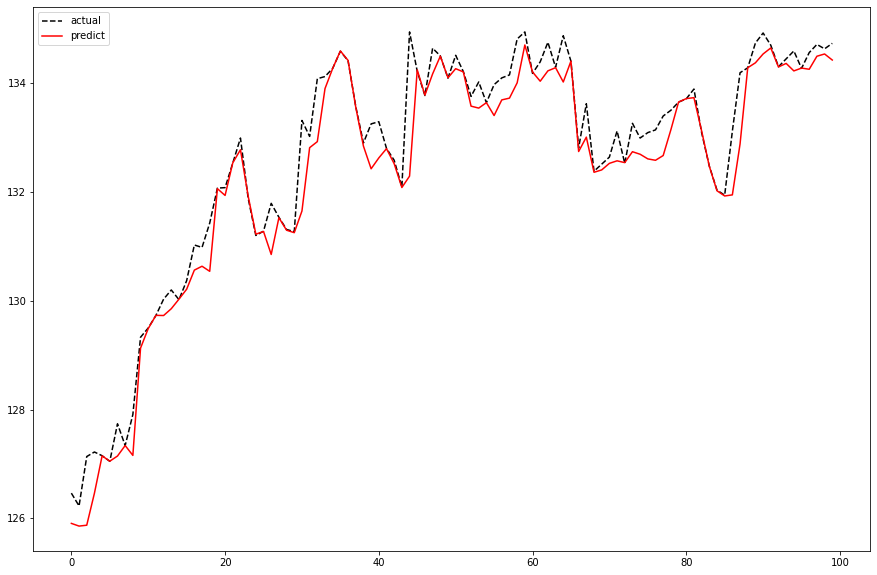

In [ ]:
import matplotlib.pyplot as plt
actual.reverse()
predictions.reverse()

plt.figure(figsize = (15,10))
plt.plot(actual , 'k--' , label = 'actual')
plt.plot(predictions , 'r', label = 'predict')
plt.legend()

In [ ]:
alpha_full = pd.concat([alpha , close, low, open, high, volume , adj_close] , 1)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

tss = OneStepTimeSeriesSplit(n_splits=100,test_period_length=1 , shuffle=False)

y = data['Close']
alpha.index.name = 'date' 


reg = xgb.XGBRegressor(n_estimators=500)
rmse = []
predictions = []
actual = []

for train_index, test_index in tss.split(alpha):
    X_train, X_test = alpha.iloc[train_index, :], alpha.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)
    test = reg.predict(X_test)
    true_values = y_test.values
    rmse.append(mean_squared_error(true_values, test))
    predictions.append(test)
    actual.append(true_values)

print("RMSE: {}".format(np.mean(rmse)))

import matplotlib.pyplot as plt

plt.plot(actual , 'k--' , label = 'actual')
plt.plot(predictions , 'r', label = 'predict')
plt.legend()

In [ ]:
reg = xgb.XGBRegressor(n_estimators=100)
rmse = []
predictions = []
actual = []

alpha_full.index.name = 'date'

for train_index, test_index in tss.split(alpha_full):
    X_train, X_test = alpha_full.iloc[train_index, :], alpha_full.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg.fit(X_train, y_train ,eval_set=[(X_train, y_train), (X_test, y_test)],  early_stopping_rounds=50, verbose=True)
    test = reg.predict(X_test )
    true_values = y_test.values
    rmse.append(mean_squared_error(true_values, test))
    predictions.append(test)
    actual.append(true_values)

print("RMSE: {}".format(np.mean(rmse)))

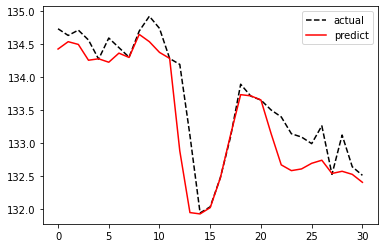

In [ ]:
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

plt.plot(actual , 'k--' , label = 'actual')
plt.plot(predictions , 'r', label = 'predict')
plt.legend()

In [ ]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [ ]:
y = data['Close']
SPLIT_IDX = round(alpha_full.shape[0]*0.9)

X_train = alpha_full.iloc[:SPLIT_IDX, :]
y_train = y.iloc[:SPLIT_IDX]

X_test = alpha_full.iloc[SPLIT_IDX: , :]
y_test = y.iloc[SPLIT_IDX:]

In [ ]:
def build_model(n_estimators = 300, max_depth = 6, gamma = 0.1 , min_child_weight= 5, reg_alpha = 0.5 , reg_lamb = 0.1  , 
                learning_rate=0.1, colsample_bytree= 0.8 , subsample =1 ):
    estimator = xgb.XGBRegressor(learning_rate=0.1, objective= 'reg:linear', random_state= 42, subsample=subsample ,
                    n_estimators =n_estimators , max_depth = max_depth , gamma = gamma, colsample_bytree=colsample_bytree, 
                    reg_alpha = reg_alpha , min_child_weight= min_child_weight)
    return estimator

In [ ]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV

r2 = make_scorer(r2_score)

model = build_model()
btscv = BlockingTimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, X_train, y_train, cv=btscv, scoring=r2)
print("Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

params = {
    'n_estimators' : [100 ,200, 300 , 500 , 600 , 700,800 , 1000],
    'max_depth':[4, 5, 7 , 9 , 12 , 15, 17, 25],
    'min_child_weight':[1, 2, 3, 4, 5, 6],
    'colsample_bytree': [0.6 , 0.7 , 0.8 , 0.9, 1],
    'subsample': [ 0.6 , 0.7 , 0.8 , 0.9, 1]}


model = build_model()

finder = GridSearchCV
(
    estimator=model,
    param_grid=params,
    scoring=r2,
    iid=False,
    refit=False,
    cv=btscv,  
    verbose=1,
    pre_dispatch=8,
    error_score=-999,
)

finder.fit(X_train, y_train)
best_params = finder.best_params_